## Exploratory Data Analysis
***Version:*** 1  
***Date:*** February 21, 2023  
***Author:*** Kerry Effinger

https://www.federalreserve.gov/monetarypolicy/openmarket.htm

In [1]:
import mysql.connector
import pandas as pd
import requests
import json
from datetime import date
import datetime
import time
import matplotlib.pyplot as plt
from pandas.plotting import table
import seaborn as sns

In [2]:
#df = pd.read_csv('layoffscsv305_symbols.csv')

In [103]:
#df

#### retrieving data from MySQL db:

In [13]:
#connection = mysql.connector.connect(user='root', password='IndyDenver22!',
                              #host='localhost',
                              #database='layoffs')
#global_cursor = connection.cursor()
#print(connection)

In [110]:
connection = mysql.connector.connect(user='layoff_user', password='IndyDenver22!',
                              host='r2klabs.com',
                              database='layoffs')

In [111]:
cursor = connection.cursor()

In [112]:
df = pd.read_sql('SELECT * FROM layoffsfyi', connection)

/Users/kerryeffinger/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [16]:
#sql = "SELECT * FROM layoffsfyi;"

#cursor.execute(sql)
#rows = cursor.fetchall();

In [17]:
#column_names = ['Company', 'Location', 'Number_laid_off', 'Layoff_date','Percent', 'Industry', 'Stage', 'Money_raised_mm', 'Date_reported']

In [18]:
#data2 = pd.DataFrame(rows, columns=column_names)

In [88]:
#data2.head()

In [113]:
df

,Company,Location,Number_laid_off,Layoff_date,Percent,Industry,Stage,Money_raised_mm,Date_reported
0,100 Thieves,Los Angeles,0,2023-01-10,0,Retail,Series C,120,2023-01-12
1,80 Acres Farms,Cincinnati,0,2023-01-18,10,Food,Unknown,275,2023-01-18
2,8x8,SF Bay Area,155,2023-01-18,7,Support,IPO,253,2023-01-18
3,Addepar,SF Bay Area,20,2023-01-18,3,Finance,Series F,491,2023-01-18
4,Affirm,SF Bay Area,500,2023-02-08,19,Finance,Post-IPO,1500,2023-02-08
...,...,...,...,...,...,...,...,...,...
254,Wyre,SF Bay Area,0,2023-01-04,100,Crypto,Unknown,29,2023-01-05
255,Yahoo,SF Bay Area,1600,2023-02-09,20,Consumer,Acquired,6,2023-02-09
256,Yext,New York City,0,2023-01-23,8,Marketing,IPO,117,2023-01-23
257,Zappos,Las Vegas,0,2023-01-20,0,Retail,Acquired,62,2023-01-21


In [109]:
df.dtypes

Company            object
Location           object
Number_laid_off     int64
Layoff_date        object
Percent             int64
Industry           object
Stage              object
Money_raised_mm     int64
Date_reported      object
dtype: object

In [5]:
df.columns

Index(['Company', 'Symbol', 'Location', 'Number_laid_off', 'Layoff_date',
       'Percent', 'Industry', 'Stage', 'Money_raised_mm', 'Date_reported',
       'Fed_int_rate'],
      dtype='object')

## Data Types

In [83]:
#df

In [6]:
df.Layoff_date = pd.to_datetime(df.Layoff_date)

In [7]:
df.Date_reported = pd.to_datetime(df.Date_reported)

In [8]:
df.dtypes

Company                    object
Symbol                     object
Location                   object
Number_laid_off           float64
Layoff_date        datetime64[ns]
Percent                   float64
Industry                   object
Stage                      object
Money_raised_mm           float64
Date_reported      datetime64[ns]
Fed_int_rate              float64
dtype: object

## Missing Data

In [9]:
C_na = df['Company'].isna().sum()/len(df['Company'])
Sym_na = df['Symbol'].isna().sum()/len(df['Symbol'])
Loc_na = df['Location'].isna().sum()/len(df['Location'])
N_na = df['Number_laid_off'].isna().sum()/len(df['Number_laid_off'])
Date_na = df['Layoff_date'].isna().sum()/len(df['Layoff_date'])
P_na = df['Percent'].isna().sum()/len(df['Percent'])
I_na = df['Industry'].isna().sum()/len(df['Industry'])
S_na = df['Stage'].isna().sum()/len(df['Stage'])
M_na = df['Money_raised_mm'].isna().sum()/len(df['Money_raised_mm'])
R_na = df['Date_reported'].isna().sum()/len(df['Date_reported'])
F_na = df['Fed_int_rate'].isna().sum()/len(df['Fed_int_rate'])

In [10]:
len(df['Number_laid_off'])

309

In [11]:
print('Company', C_na, 'Symbol', Sym_na, 'Location', Loc_na, 
      'N_laid_off',N_na, 'Layoff Date',Date_na, 
      'Percent', P_na, 'Industry', I_na, 
      'Stage', S_na, 'Money raised', M_na,
      'Date reported', R_na, 'Fed Int Rate', F_na)

Company 0.0 Symbol 0.6925566343042071 Location 0.0 N_laid_off 0.37540453074433655 Layoff Date 0.003236245954692557 Percent 0.343042071197411 Industry 0.006472491909385114 Stage 0.003236245954692557 Money raised 0.12297734627831715 Date reported 0.003236245954692557 Fed Int Rate 0.003236245954692557


## Summary Statistics

In [12]:
observations = len(df['Company'])

In [13]:
df.describe()

,Number_laid_off,Percent,Money_raised_mm,Fed_int_rate
count,193.000000,203.000000,271.000000,308.000000
mean,462.538860,19.556650,679.132841,4.603896
std,1475.367264,21.504789,1934.966857,0.123406
min,12.000000,2.000000,1.000000,4.500000
25%,55.000000,7.000000,101.000000,4.500000
50%,104.000000,12.000000,245.000000,4.500000
75%,250.000000,20.000000,556.500000,4.750000
max,12000.000000,100.000000,22200.000000,4.750000


## Categorical Variables
Location, Industry, Stage, Fed_rate (dates??)

In [14]:
Loc_cat = df['Location'].groupby(df['Location']).count()

#### If city only has one entry, add to 'other' category

In [15]:
Loc_cat = pd.DataFrame(Loc_cat)
#Loc_cat

In [16]:
loc_other = Loc_cat[Loc_cat.Location ==1]
loc_other = loc_other.Location.sum()

In [17]:
loc_other

24

In [18]:
Loc_cat1 = Loc_cat[Loc_cat.Location != 1]
Loc_cat1.rename(columns={'Location':'Companies'}, inplace=True)
Loc_cat1

/var/folders/nq/ddvf17lj6pl7qc2kn88qypj00000gn/T/ipykernel_12515/3954558115.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Loc_cat1.rename(columns={'Location':'Companies'}, inplace=True)


,Companies
Location,
Atlanta,6
Austin,9
Boise,2
Boston,24
Charlotte,2
Chicago,3
Cincinnati,2
Columbus,4
Denver,2


In [19]:
Loc_cat1 = Loc_cat1.reset_index()

In [20]:
Loc_cat1.loc[len(Loc_cat1.index)] = ['Other', loc_other] 

In [21]:
Loc_cat1

,Location,Companies
0,Atlanta,6
1,Austin,9
2,Boise,2
3,Boston,24
4,Charlotte,2
5,Chicago,3
6,Cincinnati,2
7,Columbus,4
8,Denver,2
9,Las Vegas,2


In [22]:
Loc_cat2 = Loc_cat1.copy()

In [23]:
Loc_cat2['Proportion (%)']=(Loc_cat1['Companies']/observations)*100
Loc_cat2


#loc_table = plt.subplot(111, frame_on=False) # no visible frame
#loc_table.xaxis.set_visible(False)  # hide the x axis
#loc_table.yaxis.set_visible(False)  # hide the y axis

#table(loc_table, Loc_cat2)  # where df is your data frame

#plt.savefig('location_table.png')

,Location,Companies,Proportion (%)
0,Atlanta,6,1.941748
1,Austin,9,2.912621
2,Boise,2,0.647249
3,Boston,24,7.766990
4,Charlotte,2,0.647249
5,Chicago,3,0.970874
6,Cincinnati,2,0.647249
7,Columbus,4,1.294498
8,Denver,2,0.647249
9,Las Vegas,2,0.647249


In [102]:
#Loc_cat3 = Loc_cat[Loc_cat.Location > 2]
#Loc_cat2

In [24]:
Loc_cat_plot = Loc_cat1.set_index('Location')

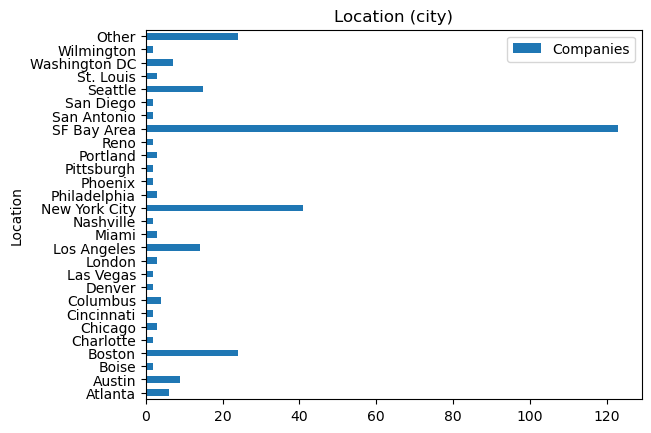

In [102]:
#plt.figure(figsize=(10,8))

Loc_cat_plot.plot.barh()
plt.title('Location (city)')
plt.xlabel('')

plt.savefig('Loc.png')

In [26]:
Ind_cat = df['Industry'].groupby(df['Industry']).count()
Ind_cat = pd.DataFrame(Ind_cat)

In [27]:
Ind_cat1 = Ind_cat.copy()
Ind_cat1['Proportion (%)']=(Ind_cat1['Industry']/observations)*100

In [28]:
Ind_cat1

,Industry,Proportion (%)
Industry,,
Construction,1,0.323625
Consumer,20,6.472492
Crypto,18,5.825243
Data,12,3.883495
Education,3,0.970874
Finance,27,8.737864
Fitness,3,0.970874
Food,8,2.588997
HR,15,4.854369


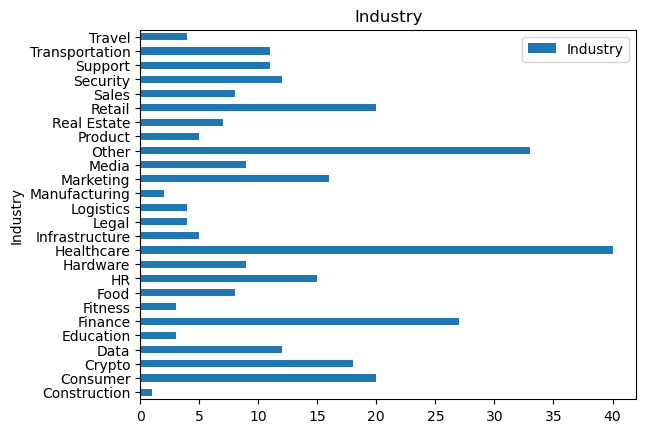

In [101]:
Ind_cat.plot.barh()
plt.title('Industry')
plt.xlabel('')

plt.savefig('Ind.png')

In [30]:
Ind_cat2 = Ind_cat[Ind_cat.Industry > 2]
#Ind_cat2

In [136]:
#Ind_cat2.plot.bar()
#plt.title('')
#plt.xlabel('')

In [31]:
Stage_cat = df['Stage'].groupby(df['Stage']).count()

In [32]:
Stage_cat = pd.DataFrame(Stage_cat)
#Stage_cat

In [33]:
Stage_cat1 = Stage_cat.copy()
Stage_cat1['Proportion (%)']=(Stage_cat['Stage']/observations)*100

In [34]:
Stage_cat1.rename(columns={"Stage": "Frequency", "Proportion (%)": "Proportion (%)"}, inplace= True)
Stage_cat1

,Frequency,Proportion (%)
Stage,,
Acquired,31,10.032362
IPO,65,21.035599
Post-IPO,50,16.181230
Private Equity,4,1.294498
Seed,4,1.294498
Series A,12,3.883495
Series B,25,8.090615
Series C,28,9.061489
Series D,16,5.177994


Text(0.5, 0, '')

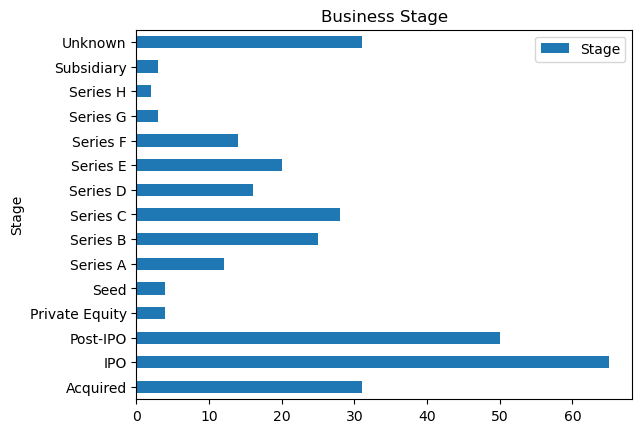

In [100]:
Stage_cat.plot.barh()
plt.title('Business Stage')
plt.xlabel('')

#plt.savefig('Loc.png')

In [36]:
Fed_cat = df['Fed_int_rate'].groupby(df['Fed_int_rate']).count()

In [37]:
Fed_cat = pd.DataFrame(Fed_cat)
Fed_cat

,Fed_int_rate
Fed_int_rate,
4.50,180
4.75,128


In [38]:
Fed_cat1 = Fed_cat.copy()
Fed_cat1['Proportion (%)']=(Fed_cat['Fed_int_rate']/observations)*100
Fed_cat1

,Fed_int_rate,Proportion (%)
Fed_int_rate,,
4.50,180,58.252427
4.75,128,41.423948


Text(0.5, 0, '')

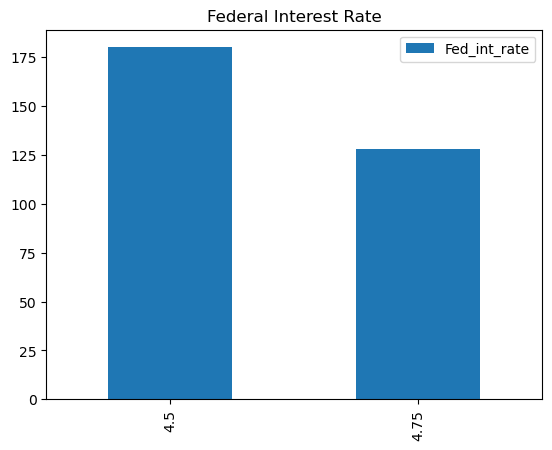

In [39]:
Fed_cat.plot.bar()
plt.title('Federal Interest Rate')
plt.xlabel('')

#plt.savefig('Loc.png')

### Correlation Matrix for 4 continuous variables:

<AxesSubplot:>

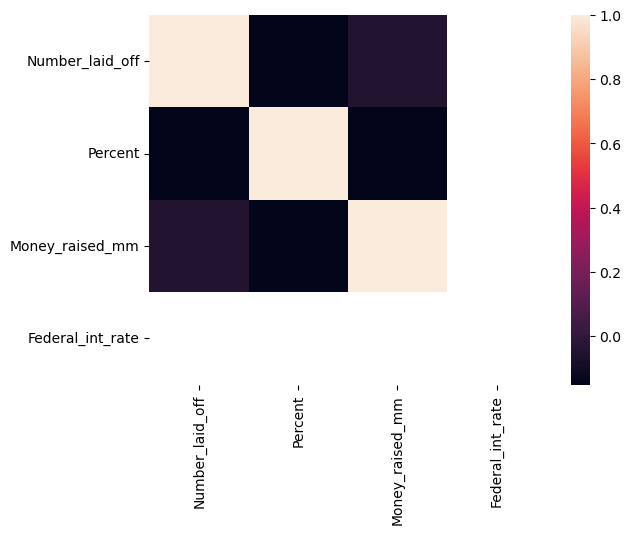

In [41]:
datacorr = pd.DataFrame(df, columns = ('Number_laid_off','Percent','Money_raised_mm','Federal_int_rate'))

sns.heatmap(datacorr.corr())    

In [55]:
corr1 = datacorr.corr()
corr1 = pd.DataFrame(corr1)
corr1

,Number_laid_off,Percent,Money_raised_mm,Federal_int_rate
Number_laid_off,1.000000,-0.147611,-0.045814,NaN
Percent,-0.147611,1.000000,-0.150447,NaN
Money_raised_mm,-0.045814,-0.150447,1.000000,NaN
Federal_int_rate,NaN,NaN,NaN,NaN


## Data Set Graphical Exploration

In [70]:
df2 = df['Number_laid_off']
df2 = df2.dropna()
df2

0      8000.0
1       245.0
2      8000.0
4       700.0
6        60.0
        ...  
300     130.0
304      79.0
305      63.0
306      30.0
307      12.0
Name: Number_laid_off, Length: 193, dtype: float64

In [71]:
df2 = pd.DataFrame(df2)
df2

,Number_laid_off
0,8000.0
1,245.0
2,8000.0
4,700.0
6,60.0
...,...
300,130.0
304,79.0
305,63.0
306,30.0


In [73]:
#sns.displot(df2, kde='True', color = 'red')

Text(0.5, 1.0, 'Number Laid Off Histogram')

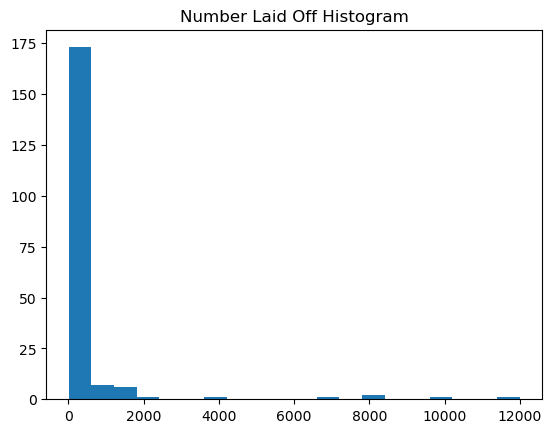

In [77]:
h1 = plt.hist(df2['Number_laid_off'], bins = 20)
plt.title('Number Laid Off Histogram')

Text(0.5, 1.0, 'Percent Laid Off Histogram')

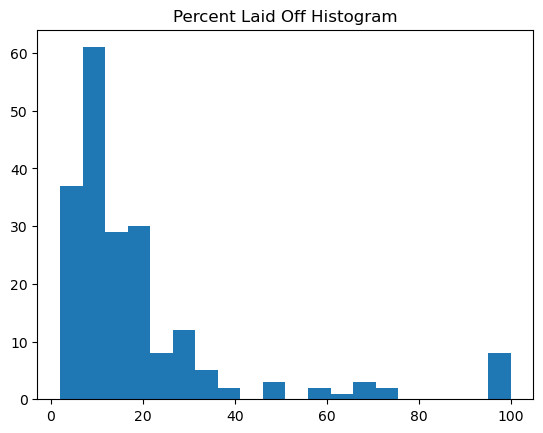

In [78]:
h2 = plt.hist(df['Percent'], bins = 20)
plt.title('Percent Laid Off Histogram')

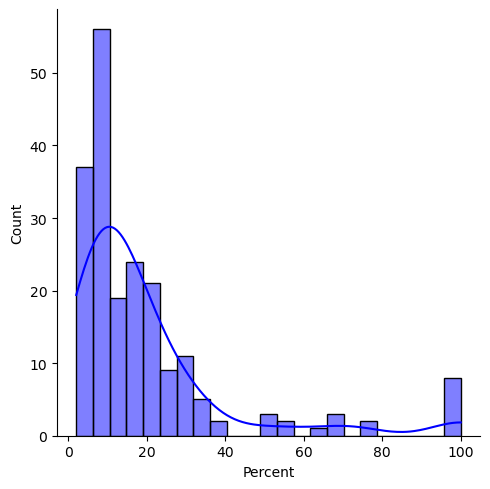

In [84]:
sns.displot(df['Percent'], kde='True', color = 'blue')

Text(0.5, 1.0, 'Money Raised Histogram')

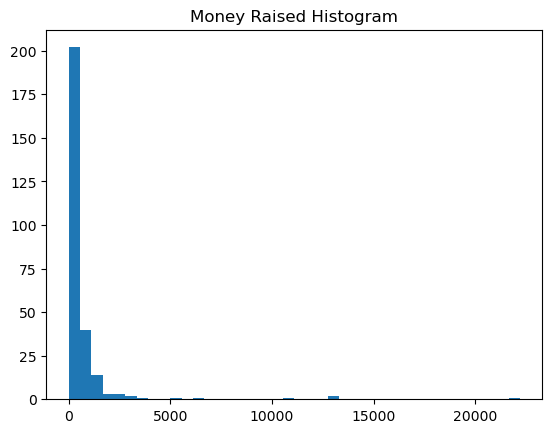

In [97]:
h3 = plt.hist(df['Money_raised_mm'], bins = 40)
plt.title('Money Raised Histogram')

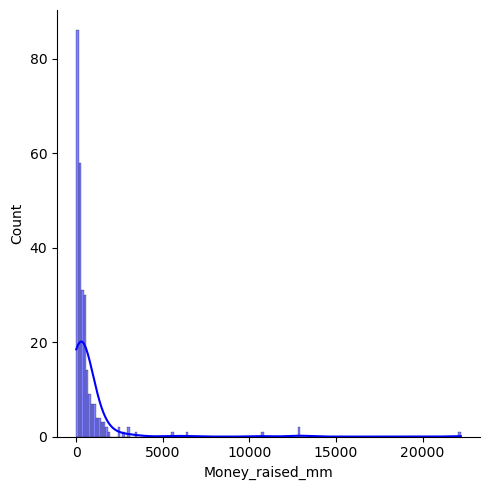

In [85]:
sns.displot(df['Money_raised_mm'], kde='True', color = 'blue')

### Scatter plots for comparisons

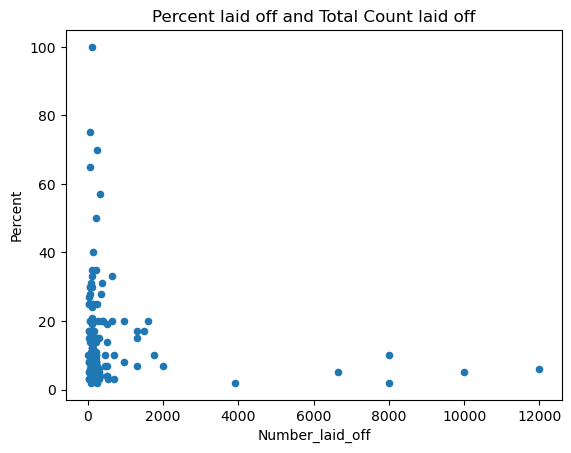

In [88]:
s1 = df.plot.scatter(x='Number_laid_off', y = 'Percent', title = 'Percent laid off and Total Count laid off')

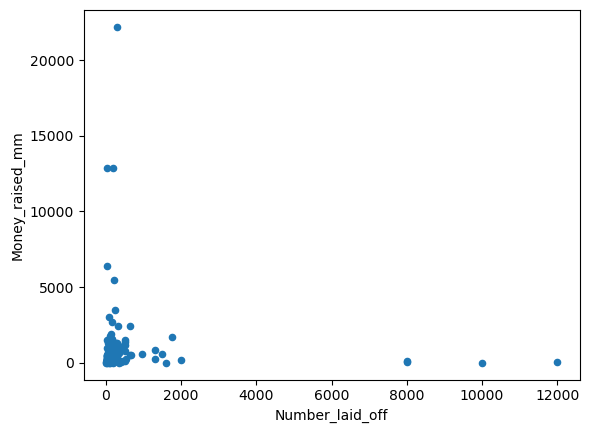

In [89]:
s2 = df.plot.scatter(x='Number_laid_off', y = 'Money_raised_mm', title= 'Money Raised ')

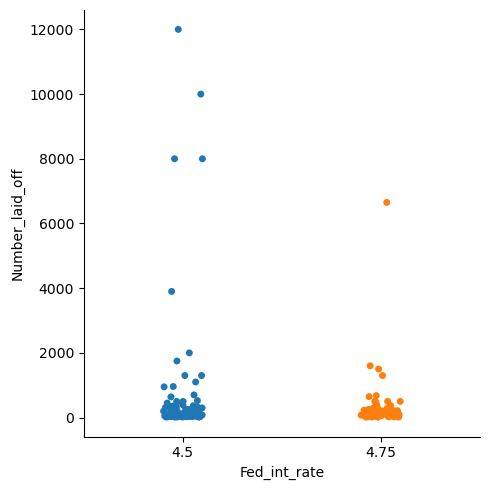

In [92]:
#s3 = df.plot.scatter(x='Fed_int_rate', y = 'Number_laid_off', title= 'Money Raised ')
sns.catplot(data=df, x="Fed_int_rate", y="Number_laid_off")

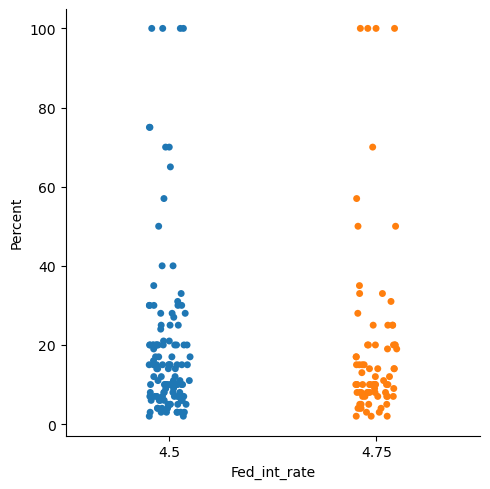

In [94]:
sns.catplot(data=df, x="Fed_int_rate", y="Percent")

In [ ]:
s2 = df.plot.scatter(x='Number_laid_off', y = 'Money_raised_mm', title= 'Money Raised ')

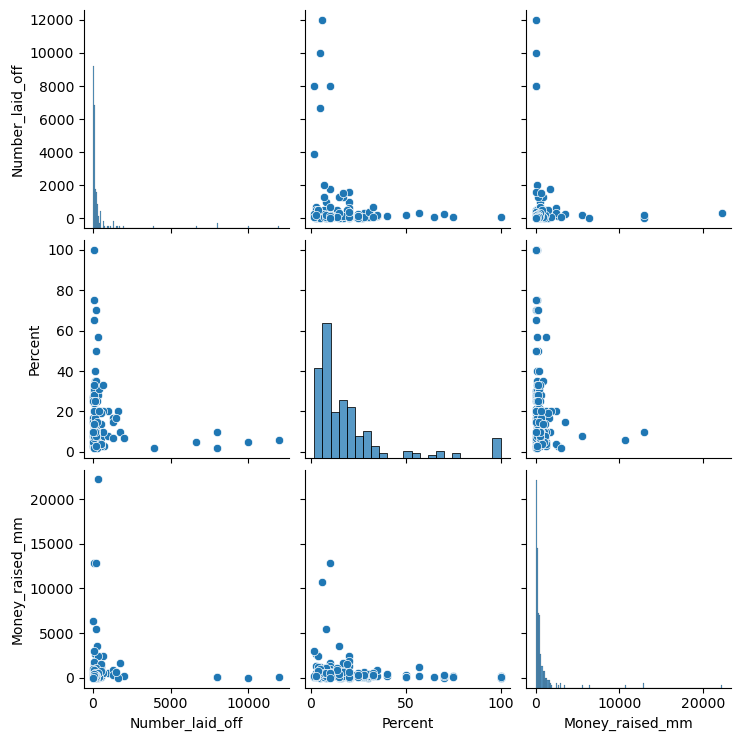

In [90]:
sns.pairplot(df[['Number_laid_off', 'Percent', 'Money_raised_mm']])

## Make a list with all symbols (column 2) that are not "NaN" then put them through the function that gets the PE ratio from yahoo finance 
### get PE ratio at time of entering data, so it is the PE ratio at the time of the layoff (approx)

In [166]:
df

,Company,Symbol,Location,Number_laid_off,Layoff_date,Percent,Industry,Stage,Money_raised_mm,Date_reported,Fed_int_rate
0,Amazon,amzn,Seattle,8000.0,2023-01-04,2.0,Retail,IPO,108.0,2023-01-04,4.50
1,Pegasystems,pega,Boston,245.0,2023-01-03,4.0,HR,IPO,NaN,2023-01-04,4.50
2,Salesforce,crm,SF Bay Area,8000.0,2023-01-04,10.0,Sales,IPO,65.0,2023-01-04,4.50
3,Vimeo,vmeo,New York City,NaN,2023-01-04,11.0,Consumer,IPO,450.0,2023-01-04,4.50
4,Amdocs,dox,St. Louis,700.0,2023-01-02,3.0,Support,IPO,NaN,2023-01-05,4.50
...,...,...,...,...,...,...,...,...,...,...,...
304,MasterClass,NaN,SF Bay Area,79.0,2023-03-02,NaN,Education,Series E,461.0,2023-03-03,4.75
305,UserTesting,NaN,SF Bay Area,63.0,2023-03-03,NaN,Marketing,Acquired,152.0,2023-03-03,4.75
306,Airbnb,NaN,SF Bay Area,30.0,2023-03-03,NaN,Travel,Post-IPO,6400.0,2023-03-03,4.75
307,CNET,NaN,SF Bay Area,12.0,2023-03-02,10.0,Media,Acquired,20.0,2023-03-03,4.75
